<a href="https://colab.research.google.com/github/aksanaboo/sephora/blob/main/SephoraRecommederSystemPart3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [40]:
#datasets
product = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/product_info.csv')
review_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_0-250.csv')
review_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_250-500.csv')
review_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_500-750.csv')
review_4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_750-1250.csv')
review_5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_1250-end.csv')

<ipython-input-40-e4867818210a>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_0-250.csv')
<ipython-input-40-e4867818210a>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_750-1250.csv')
<ipython-input-40-e4867818210a>:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_1250-end.csv')


In [41]:
df = [review_1,review_2,review_3,review_4,review_5]
review = pd.concat(df,axis=0)

In [42]:
review.duplicated().sum()

0

In [43]:
review.drop_duplicates(inplace=True)

In [44]:
review.duplicated().sum()

0

In [45]:
review_sampled = review.sample(n=10000, replace=False)

In [46]:
review_sampled.shape

(10000, 19)

In [47]:
sephora_data = review_sampled[['author_id','product_id','product_name','rating','submission_time']]

In [48]:
sephora_data.head()

,author_id,product_id,product_name,rating,submission_time
24547,967538349,P7880,Soy Hydrating Gentle Face Cleanser,4,2009-07-03
574073,12009088627,P442858,Rose Deep Hydration Sleeping Mask,4,2019-04-21
241493,2724796408,P232915,ExfoliKate Intensive Pore Exfoliating Treatment,5,2023-02-23
157479,5349160088,P379710,Regenerating Exfoliating Cleanser,5,2020-10-28
110892,1862431922,P481161,Ultimune Power Infusing Anti-Aging Serum,3,2022-02-15


In [49]:
sephora_data.duplicated().sum()

0

In [57]:
sephora_data.reset_index(inplace=True)

In [59]:
sephora_data.drop(columns='index',inplace=True)

<ipython-input-59-83e8827a9931>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sephora_data.drop(columns='index',inplace=True)


In [60]:
sephora_data.head()

,author_id,product_id,product_name,rating,submission_time
0,967538349,P7880,Soy Hydrating Gentle Face Cleanser,4,2009-07-03
1,12009088627,P442858,Rose Deep Hydration Sleeping Mask,4,2019-04-21
2,2724796408,P232915,ExfoliKate Intensive Pore Exfoliating Treatment,5,2023-02-23
3,5349160088,P379710,Regenerating Exfoliating Cleanser,5,2020-10-28
4,1862431922,P481161,Ultimune Power Infusing Anti-Aging Serum,3,2022-02-15


In [64]:
agg_rating = sephora_data.groupby('product_name').agg(mean_rating= ('rating','mean'),number_of_ratings= ('rating','count')).reset_index()

In [65]:
agg_rating.head()

,product_name,mean_rating,number_of_ratings
0,"""B"" Oil",3.333333,3
1,"""Buffet"" + Copper Peptides 1%",4.250000,4
2,(Glow)Setting 100% Mineral Powder SPF 35,5.000000,2
3,(Re) Setting Refreshing Mist SPF 40,3.666667,3
4,(Re)setting 100% Mineral Powder Sunscreen SPF ...,3.500000,2


In [68]:
# keep products with over 10 ratings
rating_10 =  agg_rating['number_of_ratings'] > 10
agg_rating_10 = agg_rating[rating_10]

In [69]:
agg_rating_10

,product_name,mean_rating,number_of_ratings
14,10% Niacinamide Night Mask,4.923077,13
16,10% Waterless Vitamin C Serum,4.000000,11
17,100 percent Pure Argan Oil,4.580645,62
21,100% Organic Cold-Pressed Rose Hip Seed Oil,4.846154,13
26,15% Vitamin C + Clean Caffeine Energy Serum,3.909091,11
...,...,...,...
1470,Watermelon Pink Juice Oil-Free Moisturizer,3.647059,17
1471,Whipped Argan Oil Face Butter,4.571429,14
1478,Wild Rose Night-Brightening Sleeping Facial,3.750000,16
1482,Wrinkle Blur Bakuchiol Eye Gel Crème,4.181818,11


In [73]:
agg_rating_10.sort_values(by='number_of_ratings',ascending=False).head()

,product_name,mean_rating,number_of_ratings
718,Lip Sleeping Mask Intense Hydration with Vitam...,4.386905,168
1383,Ultra Repair Cream Intense Hydration,4.395349,86
1197,Soy Hydrating Gentle Face Cleanser,4.317647,85
110,Alpha Beta Extra Strength Daily Peel Pads,4.514286,70
1343,The True Cream Aqua Bomb,4.492308,65


<Figure size 1000x800 with 0 Axes>

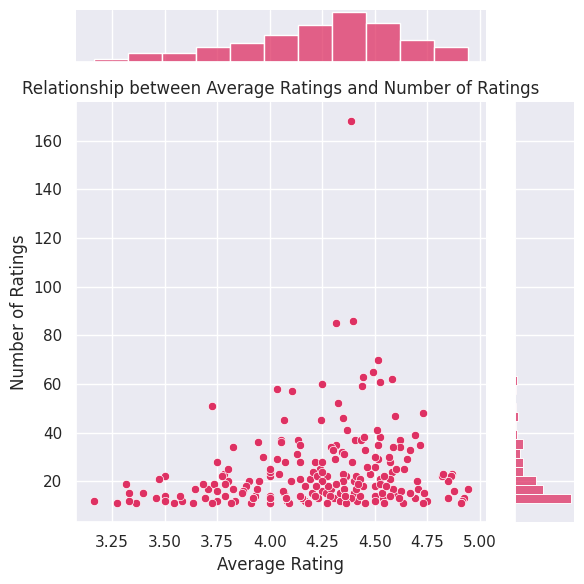

In [74]:
#relationship between mean_rating and number_of_ratings
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.jointplot(data=agg_rating_10, x='mean_rating',y='number_of_ratings',color='#DE3163')
plt.xlabel('Average Rating')
plt.ylabel('Number of Ratings')
plt.title('Relationship between Average Ratings and Number of Ratings')
plt.tight_layout()
plt.show()

In [75]:
agg_rating_10.shape

(260, 3)

In [76]:
#merge data
df_10 = pd.merge(sephora_data,agg_rating_10[['product_name']],on='product_name',how='inner')

In [77]:
df_10.head()

,author_id,product_id,product_name,rating,submission_time
0,967538349,P7880,Soy Hydrating Gentle Face Cleanser,4,2009-07-03
1,1469089954,P7880,Soy Hydrating Gentle Face Cleanser,5,2011-07-18
2,5718331372,P7880,Soy Hydrating Gentle Face Cleanser,4,2013-08-19
3,7649463904,P7880,Soy Hydrating Gentle Face Cleanser,5,2019-01-25
4,7973378796,P7880,Soy Hydrating Gentle Face Cleanser,5,2016-04-24


In [96]:
df_10.author_id.value_counts()

1458293587     2
28093283001    2
6250487578     2
25853590257    2
1324508202     2
              ..
1637751115     1
5507555372     1
1301080223     1
7014841350     1
909738598      1
Name: author_id, Length: 5735, dtype: int64

In [78]:
df_10.shape

(5772, 5)

In [79]:
#Number of unique users
print('The dataset has', df_10['author_id'].nunique(),'unique users')

#Number of unique products
print('The dataset has', df_10['product_id'].nunique(),'unique products')

The dataset has 5735 unique users
The dataset has 264 unique products


In [80]:
#create user_item matrix
matrix = df_10.pivot_table(index='product_name', columns='author_id', values='rating')
matrix.head()

author_id,398268520,776869171,785768957,901581997,904740205,912485702,922116750,922884080,924478455,928145549,...,9960925310,9964614965,9981219323,9984126313,9989637308,9990263118,9993068426,9994328292,9995075046,9995173030
product_name,,,,,,,,,,,,,,,,,,,,,
10% Niacinamide Night Mask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10% Waterless Vitamin C Serum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100 percent Pure Argan Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100% Organic Cold-Pressed Rose Hip Seed Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15% Vitamin C + Clean Caffeine Energy Serum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 0)
matrix_norm.head()

author_id,398268520,776869171,785768957,901581997,904740205,912485702,922116750,922884080,924478455,928145549,...,9960925310,9964614965,9981219323,9984126313,9989637308,9990263118,9993068426,9994328292,9995075046,9995173030
product_name,,,,,,,,,,,,,,,,,,,,,
10% Niacinamide Night Mask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10% Waterless Vitamin C Serum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100 percent Pure Argan Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100% Organic Cold-Pressed Rose Hip Seed Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15% Vitamin C + Clean Caffeine Energy Serum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# Item similarity matrix using Pearson correlation
item_similarity = matrix_norm.T.corr()
item_similarity.head()

product_name,10% Niacinamide Night Mask,10% Waterless Vitamin C Serum,100 percent Pure Argan Oil,100% Organic Cold-Pressed Rose Hip Seed Oil,15% Vitamin C + Clean Caffeine Energy Serum,5 Stars Retinol + Niacinamide Eye Serum,A-Passioni Retinol Cream,AHA 30% + BHA 2% Exfoliating Peeling Solution,Acne Control Clarifying Cleanser,Acne Solutions Clarifying Lotion,...,Water Drench Hyaluronic Acid Moisturizer,Watermelon Glow Niacinamide Dew Drops,Watermelon Glow Niacinamide Sunscreen SPF 50,Watermelon Glow PHA + BHA Pore-Tight Toner,Watermelon Glow Ultra-Fine Mist,Watermelon Pink Juice Oil-Free Moisturizer,Whipped Argan Oil Face Butter,Wild Rose Night-Brightening Sleeping Facial,Wrinkle Blur Bakuchiol Eye Gel Crème,Yo Glow AHA & BHA Facial Enzyme Scrub
product_name,,,,,,,,,,,,,,,,,,,,,
10% Niacinamide Night Mask,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10% Waterless Vitamin C Serum,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100 percent Pure Argan Oil,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100% Organic Cold-Pressed Rose Hip Seed Oil,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15% Vitamin C + Clean Caffeine Energy Serum,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
#cosine_similarity
# Item similarity matrix using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
item_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
item_similarity_cosine

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [85]:
#Predict a user's Rating for a particular product

In [86]:
sephora_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   author_id        10000 non-null  object
 1   product_id       10000 non-null  object
 2   product_name     10000 non-null  object
 3   rating           10000 non-null  int64 
 4   submission_time  10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [90]:
unique_author_ids = matrix_norm.index.unique()
print(unique_author_ids)

Index(['10% Niacinamide Night Mask', '10% Waterless Vitamin C Serum',
       '100 percent Pure Argan Oil',
       '100% Organic Cold-Pressed Rose Hip Seed Oil',
       '15% Vitamin C + Clean Caffeine Energy Serum',
       '5 Stars Retinol + Niacinamide Eye Serum', 'A-Passioni Retinol Cream',
       'AHA 30% + BHA 2% Exfoliating Peeling Solution',
       'Acne Control Clarifying Cleanser', 'Acne Solutions Clarifying Lotion',
       ...
       'Water Drench Hyaluronic Acid Moisturizer',
       'Watermelon Glow Niacinamide Dew Drops',
       'Watermelon Glow Niacinamide Sunscreen SPF 50',
       'Watermelon Glow PHA + BHA Pore-Tight Toner',
       'Watermelon Glow Ultra-Fine Mist',
       'Watermelon Pink Juice Oil-Free Moisturizer',
       'Whipped Argan Oil Face Butter',
       'Wild Rose Night-Brightening Sleeping Facial',
       'Wrinkle Blur Bakuchiol Eye Gel Crème',
       'Yo Glow AHA & BHA Facial Enzyme Scrub'],
      dtype='object', name='product_name', length=260)


In [102]:
# Pick a author ID
picked_author_id = 776869171
# Pick a product
picked_product = '15% Vitamin C + Clean Caffeine Energy Serum'
# Movies that the target user has watched
picked_author_id_bought = pd.DataFrame(matrix_norm[picked_author_id].dropna(axis=0, how='all')\
                          .sort_values(ascending=False))\
                          .reset_index()\
                          .rename(columns={1:'rating'})
picked_author_id_bought.head()

,product_name,776869171
0,Lip Sleeping Mask Intense Hydration with Vitam...,0.613095


In [103]:
# Similarity score of picked product with all the other products
picked_product_similarity_score = item_similarity[[picked_product]].reset_index().rename(columns={'15% Vitamin C + Clean Caffeine Energy Serum':'similarity_score'})
# Rank the similarities between the products user 1 rated and American Pie.
n = 5
picked_author_id_bought_similarity = pd.merge(left=picked_author_id_bought,
                                            right=picked_product_similarity_score,
                                            on='product_name',
                                            how='inner')\
                                     .sort_values('similarity_score', ascending=False)[:5]
# Take a look at the User 1 watched movies with highest similarity
picked_author_id_bought_similarity

,product_name,776869171,similarity_score
0,Lip Sleeping Mask Intense Hydration with Vitam...,0.613095,NaN
